# TP1 – Corrélation entre pixels dans une image

## Exercice d’initiation à Matlab

In [2]:
clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

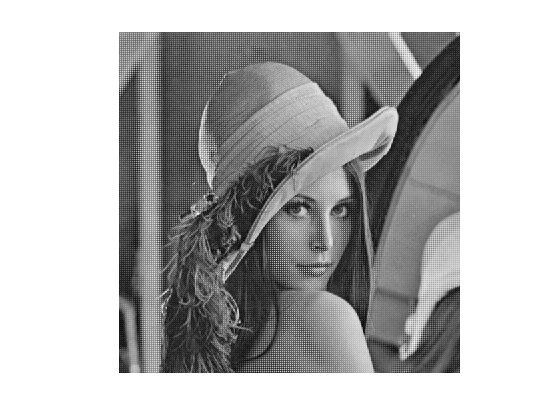

In [3]:
% Lecture et affichage de l'image originale :
image_originale = imread('image_originale.png');
figure('Name','Image originale','Position',[0,0,0.33*L,0.3*L]);
imagesc(image_originale);
axis off;
axis equal;
colormap gray;

In [4]:
% Conversion des entiers non signés en doubles :
image_originale = double(image_originale);

In [5]:
size(image_originale)


ans =

        1024        1024



In [6]:
image_originale;

In [7]:
%%file ecriture_RVB.m

function image_RVB = ecriture_RVB(image_originale)
    % Transforme une image RAW en image RVB avec un filtre de Bayer.
    n = 1024;
    image_RVB = zeros(1024/2, 1024/2, 3);
    image_RVB(:, :, 1) = image_originale(1:2:end, 2:2:end); %Rouge
    image_RVB(:, :, 2) = (image_originale(1:2:end, 1:2:end) + image_originale(2:2:end, 2:2:end))/2; %Vert
    image_RVB(:, :, 3) = image_originale(2:2:end,1:2:end); %Bleu
end

Created file '/home/jblancho/1A/Probas/tp1/ecriture_RVB.m'.


In [8]:
% Ecriture de image_RVB :
image_RVB = ecriture_RVB(image_originale);

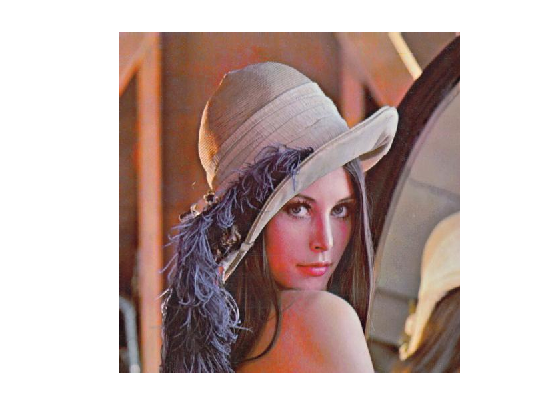

In [9]:
% Affichage de l'image RVB convertie en entiers non signes :
figure('Name','Image originale convertie en RVB','Position',[[0.33*L,0,0.33*L,0.3*L]]);
imagesc(uint8(image_RVB));
axis off;
axis equal;

In [10]:
size(image_RVB)


ans =

   512   512     3



In [11]:
%%file ecriture_RVB2.m

function image_RVB = ecriture_RVB2(image_originale)
    % Transforme une image RAW en image RVB avec un filtre de Bayer.
    n = 1024;
    image_RVB = zeros(1024/2, 1024/2, 3);
    image_RVB(:, :, 1) = image_originale(1:2:end,2:2:end);
    image_RVB(:, :, 2) = (image_originale(1:2:end, 1:2:end) + image_originale(2:2:end, 2:2:end))/2;
    image_RVB(:, :, 3) = image_originale(2:2:end,1:2:end);
end

Created file '/home/jblancho/1A/Probas/tp1/ecriture_RVB2.m'.


## Exercice 1 : mise en évidence des corrélations entre pixels voisins

In [12]:
clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

In [13]:
% Lecture d'une image interne a Matlab et conversion en doubles :
I_max = 255;
I_min = 0;
I = rgb2gray(imread('autumn.tif'));
I = double(I);

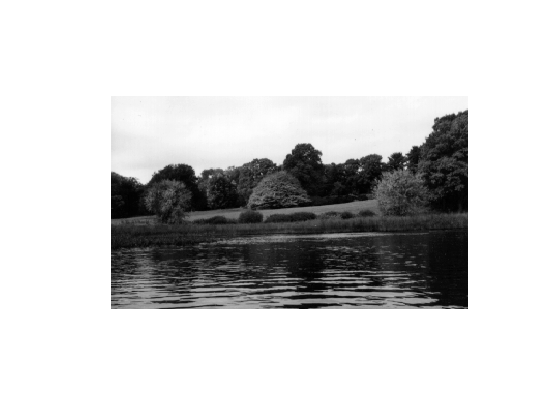

In [14]:
% Affichage de l'image :
figure('Name','Exemple d''image interne a Matlab','Position',[0,0,0.33*L,0.3*L]);
imagesc(I);
axis off;
axis equal;
colormap gray;

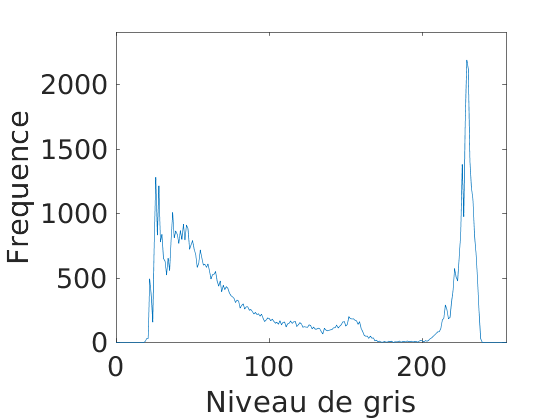

In [15]:
% Affichage de l'histogramme de l'image :
histogramme = hist(I(:),[I_min:I_max]);
figure('Name','Histogramme des niveaux de gris','Position',[0.33*L,0,0.33*L,0.3*L]);
plot([I_min:I_max],histogramme);
axis([I_min I_max 0 1.1*max(histogramme)]);
xlabel('Niveau de gris','FontSize',15);
ylabel('Frequence','FontSize',15);
set(gca,'FontSize',20);

In [16]:
%%file vectorisation.m

function [X,Y] = vectorisation(I)    
    % Sous matrice droite et gauche vectorisées.
    I_gauche = I(1:end, 1:end-1);
    I_droite = I(1:end, 2:end);
    X = I_gauche(:);
    Y = I_droite(:);
end

Created file '/home/jblancho/1A/Probas/tp1/vectorisation.m'.


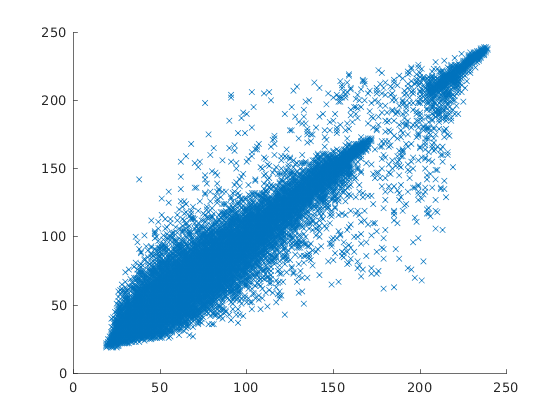

In [17]:
[X, Y] = vectorisation(I);
scatter(X,Y, 'X')

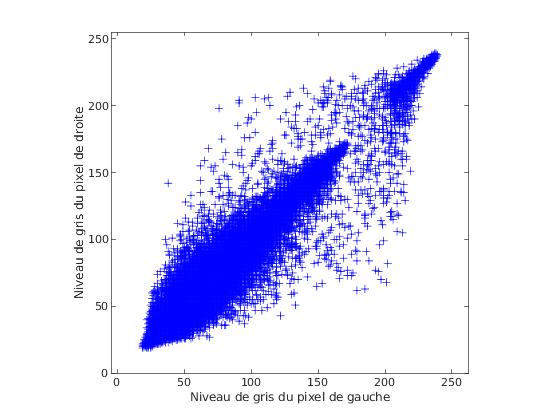

In [18]:
% Affichage des paires de niveaux de gris sous la forme d'un nuage de points :
figure('Name','Mise en evidence de la correlation entre pixels voisins','Position',[0.66*L,0,0.33*L,0.3*L]);
plot(X,Y,'b+');
axis([I_min I_max I_min I_max]);
xlabel('Niveau de gris du pixel de gauche','FontSize',8);
ylabel('Niveau de gris du pixel de droite','FontSize',8);
hold on;
set(gca,'FontSize',8);
axis equal;

In [19]:
sigmaX2 = mean(X.^2 - mean(X).^2)
sigmaY2 = mean(Y.^2 - mean(Y).^2)
sigmaXY = mean((X - mean(X)).*(Y - mean(Y)))
r = sigmaXY/sqrt(sigmaX2*sigmaY2)
a = sigmaXY/sigmaX2
b = mean(Y) - a*mean(X)


sigmaX2 =

   6.2410e+03


sigmaY2 =

   6.2384e+03


sigmaXY =

   6.1988e+03


r =

    0.9934


a =

    0.9932


b =

    0.5837



In [74]:
l = size(X,1)


l =

       70864



In [75]:
%%file calcul_parametres.m

function [r, a, b] = calcul_parametres(X, Y)
    % Calcul Parametres de correlation.
    sigmaX2 = mean(X.^2 - mean(X).^2);
    sigmaY2 = mean(Y.^2 - mean(Y).^2);
    sigmaXY = mean((X - mean(X)).*(Y - mean(Y)));
    r = sigmaXY/sqrt(sigmaX2*sigmaY2);
    a = sigmaXY/sigmaX2;
    b = mean(Y) - a*mean(X);
end

Created file '/home/jblancho/1A/Probas/tp1/calcul_parametres.m'.


In [76]:
% Calcul des parametres de la droite de regression :
[r,a,b] = calcul_parametres2(X,Y);
fprintf('Coefficient de correlation lineaire : %.4f\n',r);



r =

   6.1975e+03


a =

    0.9932


b =

    0.5837

Coefficient de correlation lineaire : 6197.4865


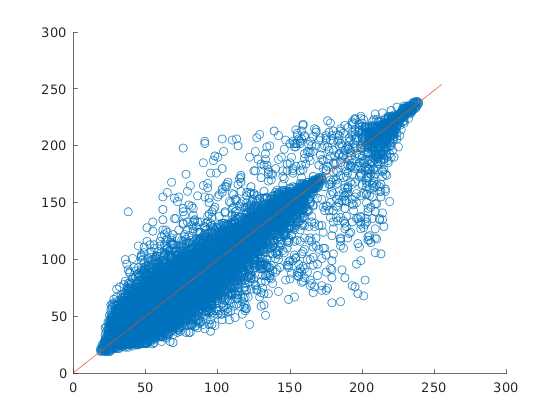

In [77]:
hold on
x = linspace(0,255);
y = a*x+b;
scatter(X,Y)
plot(x,y)
hold off

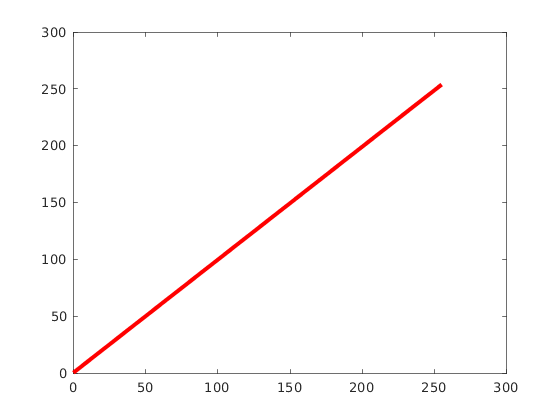

In [78]:
% Affichage de la droite de regression (d'equation y = a*x+b) :
x = I_min:I_max;
y = a*x+b;
plot(x,y,'r','LineWidth',3);

## Exercice 2 : décorrélation des niveaux de gris d’une image

In [98]:
clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

In [99]:
% Lecture d'une image interne a Matlab et conversion en doubles :
I_max = 255;
I_min = 0;
I = rgb2gray(imread('autumn.tif'));
I = double(I);

In [100]:
%%file decorrelation.m

function I_decorrelee = decorrelation(I)
    % Calcul Parametres de correlation.
    I_decorrelee = I;
    I_decorrelee(:, 2:end) = I(:, 2:end) - I(:, 1:end-1);
end

Created file '/home/jblancho/1A/Probas/tp1/decorrelation.m'.


In [101]:
I_decorrelee = decorrelation(I);
I = I_decorrelee;
%I_min = min(I_decorrelee,[],'all')
I_min = -255


I_min =

  -255



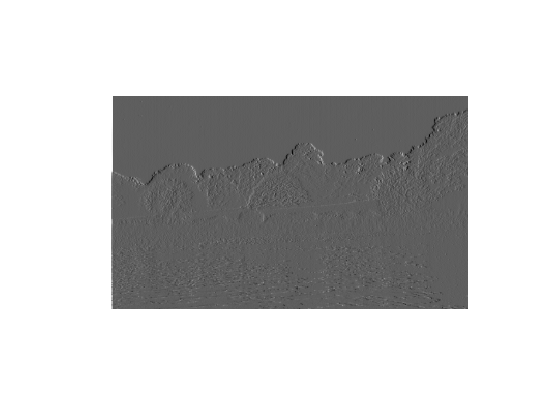

In [102]:
% Affichage de l'image :
figure('Name','Exemple d''image interne a Matlab','Position',[0,0,0.33*L,0.3*L]);
imagesc(I);
axis off;
axis equal;
colormap gray;

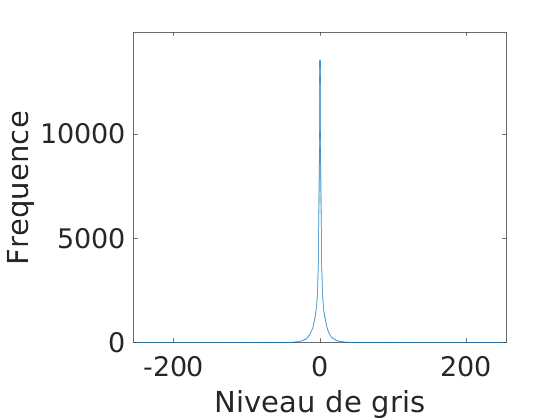

In [103]:
% Affichage de l'histogramme de l'image :
histogramme = hist(I(:),[I_min:I_max]);
figure('Name','Histogramme des niveaux de gris','Position',[0.33*L,0,0.33*L,0.3*L]);
plot([I_min:I_max],histogramme);
axis([I_min I_max 0 1.1*max(histogramme)]);
xlabel('Niveau de gris','FontSize',15);
ylabel('Frequence','FontSize',15);
set(gca,'FontSize',20);

In [104]:
% Calcul de vecteurs contenant les niveaux de gris de gauche (de droite) d'une paire de pixels :
[X,Y] = vectorisation(I);

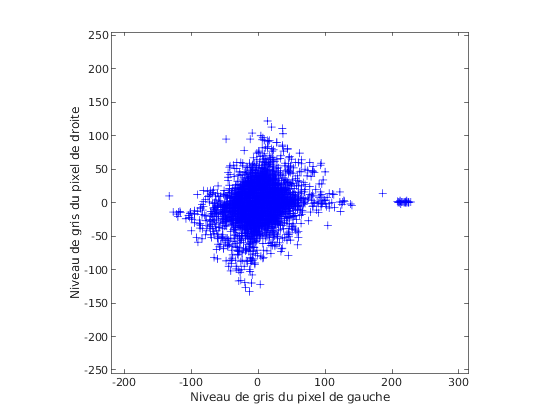

In [105]:
% Affichage des paires de niveaux de gris sous la forme d'un nuage de points :
figure('Name','Mise en evidence de la correlation entre pixels voisins','Position',[0.66*L,0,0.33*L,0.3*L]);
plot(X,Y,'b+');
axis([I_min I_max I_min I_max]);
xlabel('Niveau de gris du pixel de gauche','FontSize',8);
ylabel('Niveau de gris du pixel de droite','FontSize',8);
hold on;
set(gca,'FontSize',8);
axis equal;

In [106]:
% Calcul des parametres de la droite de regression :
[r,a,b] = calcul_parametres(X,Y);
fprintf('Coefficient de correlation lineaire : %.4f\n',r);

Coefficient de correlation lineaire : 0.1451
